# Installing necessary packages, can ask the users to restart the notebook

In [1]:
# Install required system libraries
!sudo apt-get install -y libjpeg-turbo-devel zlib-devel graphviz

# Install Python packages
%pip install --upgrade scikit-image PyMuPDF python-docx opencv-python scipy torch torchvision pillow tensorflow gdown pydot

!sudo apt-get install fonts-noto-core fonts-noto-ui-core fonts-noto-unhinted

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libjpeg-turbo-devel
E: Unable to locate package zlib-devel
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 117.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 159.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 190.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 163.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 179.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 59.3 MB/s  0:00:06m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 122.4 MB/s  0:00:020:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 MB 60.5 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 MB 131.2 MB/s  0:00:010:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 

In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 145.2 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


You will be prompted to Restart the session. Continue running the cells after restarting

# Importing the necessary modules

In [3]:
# Data Pre-processing
import fitz
import cv2
import csv
import os
from docx import Document
import string
import requests
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
from IPython.display import clear_output as cls

# Data
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import plot_model

2025-10-16 05:15:44.711886: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-16 05:15:45.053656: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-16 05:15:46.955494: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Downloading the dataset

In [4]:
# # Downloading the Dataset on collab/local notebook

# # Virtuosa ( Dataset 1)
# !gdown 'http://drive.google.com/uc?id=10NX_UbV2HMbPEO2fvKYAIXOOOec0g38g'  # Downloading link for Ancient Text
# # !gdown 'http://drive.google.com/uc?id=1YTaqNoZCYP74AuQxlyJsiQLhcoc8DNSv'  # Downloading link for Ground Truth Text

# # Perfecto ( Dataset 2)
# !gdown 'http://drive.google.com/uc?id=1x6FS3z4WhsHS7s38a2oSH8JnLQ_u_f21'  # Downloading link for Ancient Text
# # !gdown 'http://drive.google.com/uc?id=1YqQ04ZQR4xdjKlQS9xL9zkkWYx_Ppxwa'  # Downloading link for Ground Truth Text

!gdown 'http://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8'  # Downloading utils.py from cloud

Downloading...
From (original): http://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8
From (redirected): https://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8&confirm=t&uuid=64f4194c-5717-4f40-b393-9aecf4e2dcac
To: /teamspace/studios/this_studio/NepaliManiscriptRestoration/utils.py
100%|██████████████████████████████████████| 17.0k/17.0k [00:00<00:00, 49.7MB/s]


In [5]:
!ls

Model.ipynb  test_file.pdf  utils.py


# Pre-processing the dataset

### Converting PDF to images

In [6]:
from utils import pdf_to_images

pdf_path1 = "./test_file.pdf"  # Path to the PDF file
unproc_images_folder_1 = "./preprocessing/imgsUnProcessed1"  # Output folder to save the images
if not os.path.exists(unproc_images_folder_1):
    os.makedirs(unproc_images_folder_1)
pdf_to_images(pdf_path1, unproc_images_folder_1)

<img src="https://raw.githubusercontent.com/ML4SCI/DeepLearnHackathon/main/NLPRenaissanceChallenge/images/imageOriginal.png">

<!-- ### Splitting two sided scanned images into individual pages. -->

In [7]:
# Check if the folder already exists
if not os.path.exists('CRAFT_Model'):
    # If it doesn't exist, clone the repository
    !git clone 'https://github.com/nahcol10/CRAFT_Model'
else:
    print(f"The repository already exists.")

Cloning into 'CRAFT_Model'...


# Text Detection
### Extracting words from a scanned text page image can be achieved using any model of your choice. We are using the [CRAFT Model](https://github.com/clovaai/CRAFT-pytorch) for the same. (This will take 3-4 mins to process the entire model)

In [8]:
#It generally takes about ~3-4 mins
!python3 CRAFT_Model/CRAFT/BoundBoxFunc/test.py --result_folder='./preprocessing/BoundBoxApplied1/' --test_folder="./preprocessing/imgsUnProcessed1" --trained_model='CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth'

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth)
elapsed time : 15.217984676361084sgsUnProcessed1/page_2.png


### The output of this model provides coordinates of the polygon enclosing the word. Using these coordinates one can draw a bounding box and crop word images.

In [9]:
#Sorting the BB based on the Spanish writing style
from utils import sort_bounding_boxes

bound_box_applied1 = './preprocessing/BoundBoxApplied1/'
bound_box_sorted1 = "./preprocessing/BoundBoxSorted1"
if not os.path.exists(bound_box_sorted1):
    os.makedirs(bound_box_sorted1)
sort_bounding_boxes(bound_box_applied1, bound_box_sorted1)

<img src="https://raw.githubusercontent.com/ML4SCI/DeepLearnHackathon/main/NLPRenaissanceChallenge/images/imageCRAFT.jpg">

# Generating Test Data

###  Extracts and saves bounding boxes from images using a numeric counter for filenames, skipping the training images.

In [10]:
# from utils import apply_extraction_to_folder_for_test
from utils import count_files_in_folder, extract_bounding_boxes

def apply_extraction_to_folder_for_test(image_folder, bounding_box_folder, output_folder, word, TRAIN_PAGES):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) 
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files.sort()  # Ensure consistent ordering
    
    # Skip training pages and process remaining images
    test_images = image_files[TRAIN_PAGES:]
    
    for image_filename in test_images:
        if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
            image_base_name = os.path.splitext(image_filename)[0]
            print(f"Processing: {image_base_name}")
            
            # Try different naming patterns for bounding box files
            possible_bb_names = [
                f"res_{image_base_name}_sorted.txt",  # res_image_1_sorted.txt
                f"res_{image_base_name.replace('image_', 'page_')}_sorted.txt"  # res_page_1_sorted.txt
            ]
            
            bounding_box_path = None
            for bb_name in possible_bb_names:
                bb_path = os.path.join(bounding_box_folder, bb_name)
                if os.path.exists(bb_path):
                    bounding_box_path = bb_path
                    print(f"Found bounding box file: {bb_name}")
                    break
            
            if bounding_box_path:
                image_path = os.path.join(image_folder, image_filename)
                word = extract_bounding_boxes(image_path, bounding_box_path, output_folder, word)
            else:
                print(f'Bounding box file for {image_filename} does not exist.')
                print(f'Tried: {possible_bb_names}')
    
    return word

# Apply extraction for test data
proc_images_folder_1 = './preprocessing/imgsUnProcessed1'
bound_box_sorted1 = './preprocessing/BoundBoxSorted1'
word = 0
TRAIN_PAGES = 0
testing_data1 = './testing_data1'

word = apply_extraction_to_folder_for_test(proc_images_folder_1, bound_box_sorted1, testing_data1, word, TRAIN_PAGES)
print(f"Total words extracted: {word}")

Processing: page_1
Found bounding box file: res_page_1_sorted.txt
Processing: page_2
Found bounding box file: res_page_2_sorted.txt
Processing: page_3
Found bounding box file: res_page_3_sorted.txt
Total words extracted: 1016


In [11]:
from utils import pad_and_resize_images

testing_data1 = './testing_data1'
pad_and_resize_images(testing_data1)

Processed and replaced: ./testing_data1/495;15.png
Processed and replaced: ./testing_data1/633;30.png
Processed and replaced: ./testing_data1/987;32.png
Processed and replaced: ./testing_data1/548;20.png
Processed and replaced: ./testing_data1/965;30.png
Processed and replaced: ./testing_data1/517;17.png
Processed and replaced: ./testing_data1/162;14.png
Processed and replaced: ./testing_data1/307;26.png
Processed and replaced: ./testing_data1/585;24.png
Processed and replaced: ./testing_data1/472;13.png
Processed and replaced: ./testing_data1/49;4.png
Processed and replaced: ./testing_data1/364;3.png
Processed and replaced: ./testing_data1/972;30.png
Processed and replaced: ./testing_data1/427;9.png
Processed and replaced: ./testing_data1/98;8.png
Processed and replaced: ./testing_data1/929;26.png
Processed and replaced: ./testing_data1/129;11.png
Processed and replaced: ./testing_data1/503;16.png
Processed and replaced: ./testing_data1/703;5.png
Processed and replaced: ./testing_data

Processed and replaced: ./testing_data1/819;16.png
Processed and replaced: ./testing_data1/279;24.png
Processed and replaced: ./testing_data1/660;2.png
Processed and replaced: ./testing_data1/825;17.png
Processed and replaced: ./testing_data1/892;23.png
Processed and replaced: ./testing_data1/72;6.png
Processed and replaced: ./testing_data1/533;18.png
Processed and replaced: ./testing_data1/795;13.png
Processed and replaced: ./testing_data1/8;0.png
Processed and replaced: ./testing_data1/169;14.png
Processed and replaced: ./testing_data1/82;6.png
Processed and replaced: ./testing_data1/877;21.png
Processed and replaced: ./testing_data1/303;26.png
Processed and replaced: ./testing_data1/354;2.png
Processed and replaced: ./testing_data1/444;11.png
Processed and replaced: ./testing_data1/635;30.png
Processed and replaced: ./testing_data1/86;7.png
Processed and replaced: ./testing_data1/747;9.png
Processed and replaced: ./testing_data1/843;18.png
Processed and replaced: ./testing_data1/858

# Gathering Training Data

### 2 methods of generating training data:
1. Use the Dataset_generation.ipynb
2. Use modified and corrected data from drive link(better results)

### Generating training data using Dataset_generation Function

Run the Dataset_Generation.ipynb before running this notebook, to generate the training data. OR Directly run the below command

In [23]:
# %pip install jupyter nbconvert

In [24]:
# !jupyter nbconvert --to notebook --execute Dataset_Generation.ipynb

In [25]:
# Transferring the corrected dataset to the correct location for training
# !mv './outputChanged/output' './training_data1'

### Manually Corrected Training data

In [12]:
!gdown 'https://drive.google.com/uc?id=1t3CoVe2m6kUQJ7VbiK3xZX8sDV69qxPW' -O outputCorrected.zip
!unzip outputCorrected.zip

Downloading...
From: https://drive.google.com/uc?id=1t3CoVe2m6kUQJ7VbiK3xZX8sDV69qxPW
To: /teamspace/studios/this_studio/NepaliManiscriptRestoration/outputCorrected.zip
100%|███████████████████████████████████████| 2.76M/2.76M [00:00<00:00, 205MB/s]
Archive:  outputCorrected.zip
   creating: labeled_data/
 extracting: labeled_data/अध्ययनहरूका.png  
  inflating: labeled_data/अनुसन्धानकर्ताहरूको.png  
 extracting: labeled_data/अब.png  
 extracting: labeled_data/आएको.png  
 extracting: labeled_data/आफूले.png  
 extracting: labeled_data/खण्ड.png  
 extracting: labeled_data/गरेका.png  
 extracting: labeled_data/गर्ने.png  
 extracting: labeled_data/गुणात्मक.png  
 extracting: labeled_data/चरणमा.png  
 extracting: labeled_data/चुनौतीपूर्ण.png  
 extracting: labeled_data/छ।.png  
 extracting: labeled_data/तथ्यहरूको.png  
 extracting: labeled_data/तथ्यांकलाई.png  
 extracting: labeled_data/तेस्रो.png  
 extracting: labeled_data/दिन्छन्.png  
 extracting: labeled_data/दोस्रो.png  
 extracting: 

In [13]:
# Transferring the corrected dataset to the correct location for training
!mv './labeled_data' './training_data'

# Working on Training_data

### Padding small sized words for no distortion

In [14]:
from utils import pad_and_resize_images

# adding padding to the left and right of small sized words
training_data = './training_data'
pad_and_resize_images(training_data)

Processed and replaced: ./training_data/गै.png
Processed and replaced: ./training_data/श्री.png
Processed and replaced: ./training_data/डि.png
Processed and replaced: ./training_data/खै.png
Processed and replaced: ./training_data/शं.png
Processed and replaced: ./training_data/पुरा.png
Processed and replaced: ./training_data/घौ.png
Processed and replaced: ./training_data/मुलुकहरूको.png
Processed and replaced: ./training_data/जं.png
Processed and replaced: ./training_data/हास.png
Processed and replaced: ./training_data/प्रत्येकलाई.png
Processed and replaced: ./training_data/क्षू.png
Processed and replaced: ./training_data/गर्न.png
Processed and replaced: ./training_data/ढ.png
Processed and replaced: ./training_data/(जेनरलाइजेशन).png
Processed and replaced: ./training_data/ठा.png
Processed and replaced: ./training_data/प्रारम्भिक.png
Processed and replaced: ./training_data/सामान्यीकरण.png
Processed and replaced: ./training_data/आफूले.png
Processed and replaced: ./training_data/झः.png
Proc

Processed and replaced: ./training_data/घु.png
Processed and replaced: ./training_data/ठ.png
Processed and replaced: ./training_data/प्रभावशालि.png
Processed and replaced: ./training_data/ब.png
Processed and replaced: ./training_data/केन्द्रले.png
Processed and replaced: ./training_data/जस्तो .png
Processed and replaced: ./training_data/ज्ञी.png
Processed and replaced: ./training_data/बै.png
Processed and replaced: ./training_data/ङा.png
Processed and replaced: ./training_data/यौ.png
Processed and replaced: ./training_data/वृत्ति.png
Processed and replaced: ./training_data/षं.png
Processed and replaced: ./training_data/सहभागिताको.png
Processed and replaced: ./training_data/समुहहरूका.png
Processed and replaced: ./training_data/राजनैतिक.png
Processed and replaced: ./training_data/दिनका.png
Processed and replaced: ./training_data/टं.png
Processed and replaced: ./training_data/तेश्रो.png
Processed and replaced: ./training_data/गरिन्छ.png
Processed and replaced: ./training_data/हं.png
Proce

### Image Augmentation by Rotation

In [15]:
from utils import rotation_aug

training_data = './training_data'
rotation_aug(training_data)
print("Image augmentation by Rotation completed.")

Image augmentation by Rotation completed.


### Image augmentation by Gaussian Noise

In [16]:
from utils import gaussian_noise_aug

training_data = './training_data'
gaussian_noise_aug(training_data)
print("Image augmentation by Gaussian Noise completed.")

Image augmentation by Gaussian Noise completed.


### Creates a CSV file listing all files in a specified folder, excluding files named ".png", with columns for the filename and its identity (name without extension).

In [17]:
from utils import create_csv_from_folder

# Train data
training_data = './training_data'
train_csv_path = './training_data.csv'
create_csv_from_folder(training_data, train_csv_path)

# Test data
test_data1 = "./testing_data1"
test_csv_path1 = './testing_data1.csv'
create_csv_from_folder(test_data1, test_csv_path1)

CSV file "./training_data.csv" created successfully.
CSV file "./testing_data1.csv" created successfully.


In [18]:
import pandas as pd

### Splitting train and test dataset

In [19]:
df = pd.read_csv('training_data.csv')
df.shape

(26752, 2)

In [20]:
df['IDENTITY'] = df['IDENTITY'].apply(lambda x: x.split('_')[0]).apply(lambda x: x.split(' ')[0])

In [21]:
TRAIN_SIZE = int(df.shape[0]*0.8)
df_train = df.iloc[:TRAIN_SIZE]
df_valid = df.iloc[TRAIN_SIZE+1:]

In [22]:
df_train.to_csv('train.csv', index=False)
df_train.head()

FILENAME  IDENTITY
0              ऊ_rot1.png         ऊ
1         उल्लेख_rot5.png    उल्लेख
2                  गै.png        गै
3       स्वास्नी_rot2.png  स्वास्नी
4  सांखिक_rot-1_gauss.png    सांखिक

In [23]:
df_valid.to_csv('valid.csv', index=False)
df_valid.head()


FILENAME IDENTITY
21402          आठवटा_rot3.png    आठवटा
21403          घटेको_rot1.png    घटेको
21404  प्रशस्त_rot3_gauss.png  प्रशस्त
21405      एकै_rot2_gauss.png      एकै
21406    लागि_rot-3_gauss.png     लागि

### This code sets up configuration parameters and file paths for training, validating, and testing an OCR model, including image size, batch size, number of epochs, model name, callbacks, learning rate, random seeds, dataset file paths, data sizes, and prefetching settings.

In [24]:
# Image Size
IMG_WIDTH = 200
IMG_HEIGHT = 50
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)

# Batch Size
BATCH_SIZE = 16

# EPOCHS
EPOCHS = 25  # It can be increased for generating the final model.

# Model Name
MODEL_NAME = 'NepaliOCR'

# Callbacks
CALLBACKS = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint(filepath=MODEL_NAME + ".h5", save_best_only=True)  # .h5 extension removed
]

# Learning Rate
LEARNING_RATE = 1e-3

# Random Seed
np.random.seed(2569)
tf.random.set_seed(2569)

# File Paths ( replace 1 by 2,3 ... so as to test other folders)
train_csv_path = './train.csv'
valid_csv_path = './valid.csv'
test_csv_path = './testing_data1.csv'

train_image_dir = './training_data'
valid_image_dir = './training_data'
test_image_dir = './testing_data1'

# AUTOTUNE
AUTOTUNE = tfd.AUTOTUNE

In [25]:
# Train CSV
train_csv = pd.read_csv(train_csv_path)

# Validation CSV
valid_csv = pd.read_csv(valid_csv_path)

# Test CSV
test_csv = pd.read_csv(test_csv_path)

In [26]:
# In order to convert int to string to prevent tf error
test_csv['IDENTITY'] = test_csv['IDENTITY'].apply(lambda x: str(x))

In [27]:
labels = [str(word) for word in df['IDENTITY'].to_numpy()]
labels[:10]

['ऊ',
 'उल्लेख',
 'गै',
 'स्वास्नी',
 'सांखिक',
 'क्षू',
 'ङु',
 'कार्य',
 'शरीर',
 'नेपाली']

### This code extracts unique characters from the dataset labels, calculates the total number of unique characters, and prints both the count and the set of unique characters

In [28]:
# Unique characters
unique_chars = set(char for word in labels for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 83
Unique Characters : 
{'य', ',', 'ौ', 'ण', 'इ', 'न', 'ख', 'व', 'ञ', '७', 'ा', 'च', 'e', ':', '्', 'घ', 'ृ', '(', 'n', '८', 'फ', 'आ', 'थ', 'श', '५', 'ऋ', 'भ', '।', 'ई', 'ल', 'ह', 'ऐ', 'ष', 'ड', '३', 's', 'अ', '०', 'ि', 'ध', 'उ', 'ब', 'T', 'ङ', 'त', 'ओ', '२', '़', 'ठ', '४', 'ी', '.', ')', 'ै', 'औ', 'ढ', 'झ', 'ऊ', 'प', 'ए', 'ऱ', '-', 'छ', 'ज', '१', 'ं', 'द', 'ट', 'म', 'ो', '९', 'े', 'ु', 'र', '६', 'ँ', 'ः', 'r', 'स', 'क', 'd', 'ू', 'ग'}


In [29]:
MAX_LABEL_LENGTH = max(map(len, labels))
print(f"Maximum length of a label : {MAX_LABEL_LENGTH}")

Maximum length of a label : 21


### This code updates the file paths in the FILENAME columns of the training, validation, and test CSV dataframes by prepending the respective image directory paths to each filename.

In [30]:
train_csv['FILENAME'] = [train_image_dir + f"/{filename}" for filename in train_csv['FILENAME']]
valid_csv['FILENAME'] = [valid_image_dir + f"/{filename}" for filename in valid_csv['FILENAME']]
test_csv['FILENAME']  = [test_image_dir + f"/{filename}" for filename in test_csv['FILENAME']]

In [31]:
train_csv.head()

FILENAME  IDENTITY
0              ./training_data/ऊ_rot1.png         ऊ
1         ./training_data/उल्लेख_rot5.png    उल्लेख
2                  ./training_data/गै.png        गै
3       ./training_data/स्वास्नी_rot2.png  स्वास्नी
4  ./training_data/सांखिक_rot-1_gauss.png    सांखिक

In [32]:
test_csv.head()

FILENAME IDENTITY
0  ./testing_data1/495;15.png   495;15
1  ./testing_data1/633;30.png   633;30
2  ./testing_data1/987;32.png   987;32
3  ./testing_data1/548;20.png   548;20
4  ./testing_data1/965;30.png   965;30

### This code creates two dictionaries: one that maps unique characters to numeric values using StringLookup, and another that reverses this mapping, converting numeric values back to characters.

In [33]:
# Character to numeric value dictionary
char_to_num = layers.StringLookup(
    vocabulary = list(unique_chars),
    mask_token = None
)

# Reverse dictionary
num_to_char = layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(),
    mask_token = None,
    invert = True
)

I0000 00:00:1760591954.938370    4236 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21087 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:04.0, compute capability: 8.9


### This function loads an image from a given path, decodes it as a JPEG, converts it to a tensor, resizes and normalizes it, and then returns the processed image as a tensor.

In [34]:
def load_image(image_path : str):
    '''
    This function loads and preprocesses images. It first receives the image path, which is used to
    decode the image as a JPEG using TensorFlow. Then, it converts the image to a tensor and applies
    two processing functions: resizing and normalization. The processed image is then returned by
    the function.

    Argument :
        image_path : The path of the image file to be loaded.

    Return:
        image : The loaded image as a tensor.
    '''

    # Read the Image
    image = tf.io.read_file(image_path)

    # Decode the image
    decoded_image = tf.image.decode_jpeg(contents = image, channels = 1)

    # Convert image data type.
    cnvt_image = tf.image.convert_image_dtype(image = decoded_image, dtype = tf.float32)

    # Resize the image
    resized_image = tf.image.resize(images = cnvt_image, size = (IMG_HEIGHT, IMG_WIDTH))

    # Transpose
    image = tf.transpose(resized_image, perm = [1, 0, 2])

    # Convert image to a tensor.
    image = tf.cast(image, dtype = tf.float32)

    # Return loaded image
    return image

### This function loads and preprocesses an image, converts a given label string into a sequence of numeric values, pads the numeric sequence to a fixed length, and returns a dictionary containing the processed image tensor and the label tensor.

In [35]:
def encode_single_sample(image_path : str, label : str):

    '''
    The function takes an image path and label as input and returns a dictionary containing the processed image tensor and the label tensor.
    First, it loads the image using the load_image function, which decodes and resizes the image to a specific size. Then it converts the given
    label string into a sequence of Unicode characters using the unicode_split function. Next, it uses the char_to_num layer to convert each
    character in the label to a numerical representation. It pads the numerical representation with a special class (n_classes)
    to ensure that all labels have the same length (MAX_LABEL_LENGTH). Finally, it returns a dictionary containing the processed image tensor
    and the label tensor.

    Arguments :
        image_path : The location of the image file.
        label      : The text to present in the image.

    Returns:
        dict : A dictionary containing the processed image and label.
    '''

    # Get the image
    image = load_image(image_path)

    # Convert the label into characters
    chars = tf.strings.unicode_split(label, input_encoding='UTF-8')

    # Convert the characters into vectors
    vecs = char_to_num(chars)

    # Pad label
    pad_size = MAX_LABEL_LENGTH - tf.shape(vecs)[0]
    vecs = tf.pad(vecs, paddings = [[0, pad_size]], constant_values=n_classes+1)

    return {'image':image, 'label':vecs}

### This code splits the combined dataset into training and validation subsets, shuffles the data, and then creates batched and prefetched TensorFlow datasets for efficient data loading during model training.

In [36]:
# Further split the training dataset into training and validation subsets
train_size = int(0.8*len(df))  # 80% of the training data for training
val_size = len(df) - train_size  # Remaining 20% for validation

# Splitting the training dataset
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(df['FILENAME'].to_list()), np.array(df['IDENTITY'].to_list()))
).shuffle(train_size)

# Create training dataset
train_ds = train_ds.take(train_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Create validation dataset
valid_ds = train_ds.skip(train_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)

### This code creates TensorFlow datasets for training, validation, and testing by loading image paths and labels, shuffling the training data, applying the encode_single_sample function to preprocess the images and labels, batching the data, and using prefetching for optimized data loading.

In [37]:
# Training Data
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train_csv['FILENAME'].to_list()), np.array(train_csv['IDENTITY'].to_list()))
).shuffle(train_size).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Validation data
valid_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(valid_csv['FILENAME'].to_list()), np.array(valid_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Testing data.
test_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(test_csv['FILENAME'].to_list()), np.array(test_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [38]:
print(f"Training Data Size   : {tf.data.Dataset.cardinality(train_ds).numpy() * BATCH_SIZE}")
print(f"Validation Data Size : {tf.data.Dataset.cardinality(valid_ds).numpy() * BATCH_SIZE}")
print(f"Testing Data Size    : {tf.data.Dataset.cardinality(test_ds).numpy() * BATCH_SIZE}")

Training Data Size   : 21408
Validation Data Size : 5360
Testing Data Size    : 1024


### Resizes all images in the input folder to a specified size and saves them as PNG files in the output folder, ensuring the output directory exists.

In [39]:
# Set the new size in pixels (width, height) according to your choice
def resize_images_in_folder(input_folder, new_size=(200,50)):
    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        # Open the image
        with Image.open(os.path.join(input_folder, filename)) as img:
            # Resize the image
            resized_img = img.resize(new_size)
            # Save the resized image to the output folder
            output_filename = os.path.splitext(filename)[0] + '.png'  # Ensure output format is PNG
            resized_img.save(os.path.join(input_folder, output_filename))

training_image_dir = "./training_data"
resize_images_in_folder(training_image_dir)

test_image_dir = "./testing_data1"
resize_images_in_folder(test_image_dir)

### Displays a grid of images with their true labels, and optionally their predicted labels if a model is provided, using Matplotlib for visualization.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


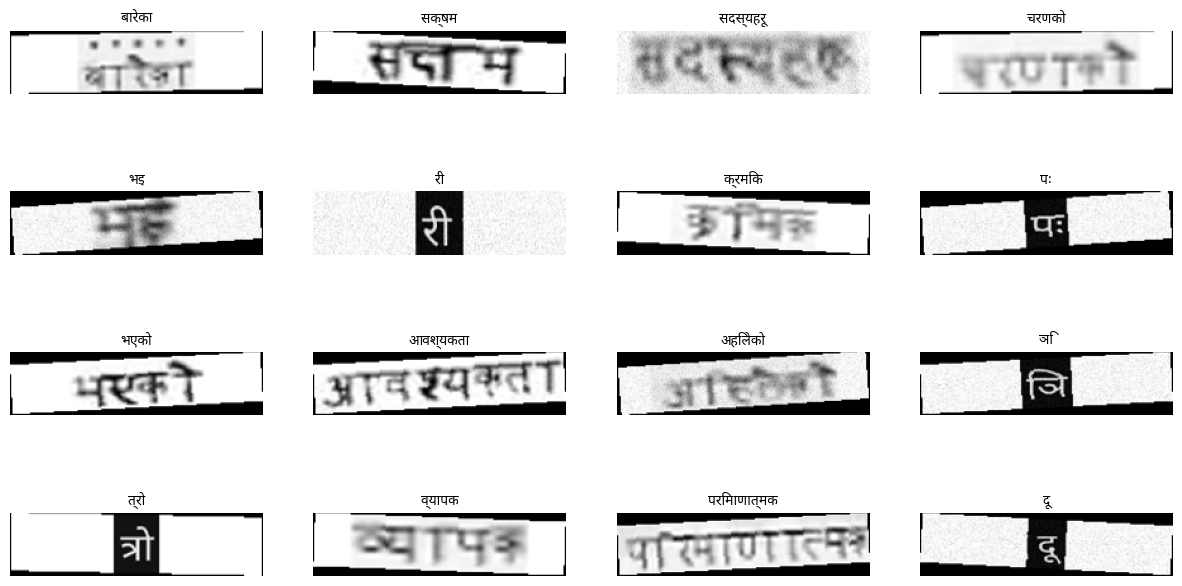

In [40]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set the font properties to use a Devanagari-supporting font
font_prop = font_manager.FontProperties(family='Noto Sans Devanagari')

def show_images(data, GRID=[4,4], FIGSIZE=(25, 8), cmap='binary_r', model=None, decode_pred=None):

    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID

    # Loading Data
    data = next(iter(data))
    images, labels = data['image'], data['label']

    # Iterate over the data
    for index, (image, label) in enumerate(zip(images, labels)):

        # Label processing
        text_label = num_to_char(label)
        text_label = tf.strings.reduce_join(text_label).numpy().decode('UTF-8')
        text_label = text_label.replace("[UNK]", " ").strip()

        # Create a sub plot
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(tf.transpose(image, perm=[1,0,2]), cmap=cmap)
        plt.axis('off')

        if model is not None and decode_pred is not None:
            # Make prediction
            pred = model.predict(tf.expand_dims(image, axis=0))
            pred = decode_pred(pred)[0]
            title = f"True : {text_label}\\nPred : {pred}"
            # Use the font properties for the title
            plt.title(title, fontproperties=font_prop)
        else:
            # add title and use the font properties
            plt.title(text_label, fontproperties=font_prop)

    # Show the final plot
    cls()
    plt.show()

# Now, call the show_images function with your training data
show_images(train_ds, GRID=[4, 4], FIGSIZE=(15, 8))

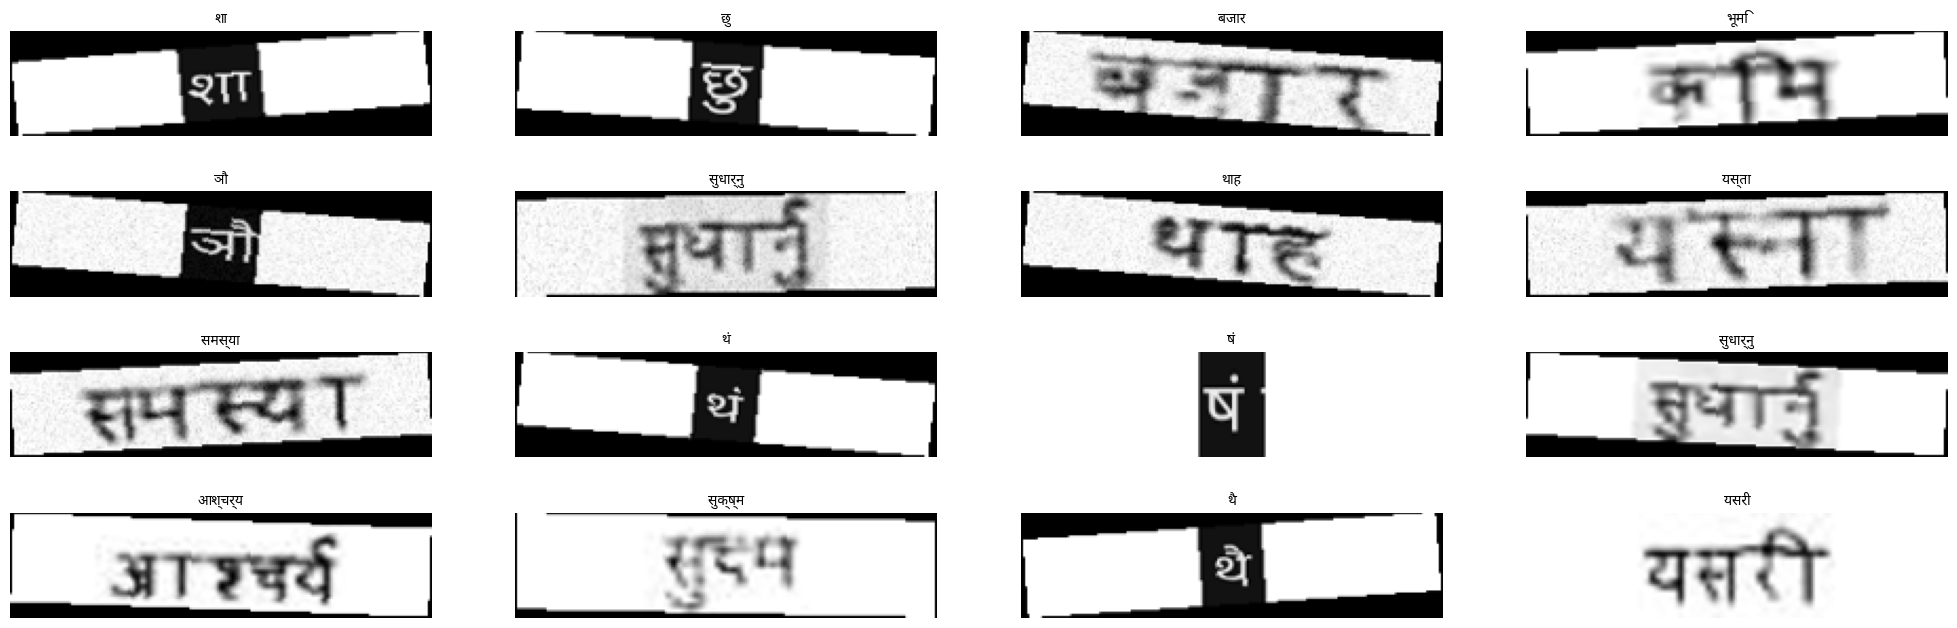

In [41]:
show_images(data=train_ds, cmap='gray')

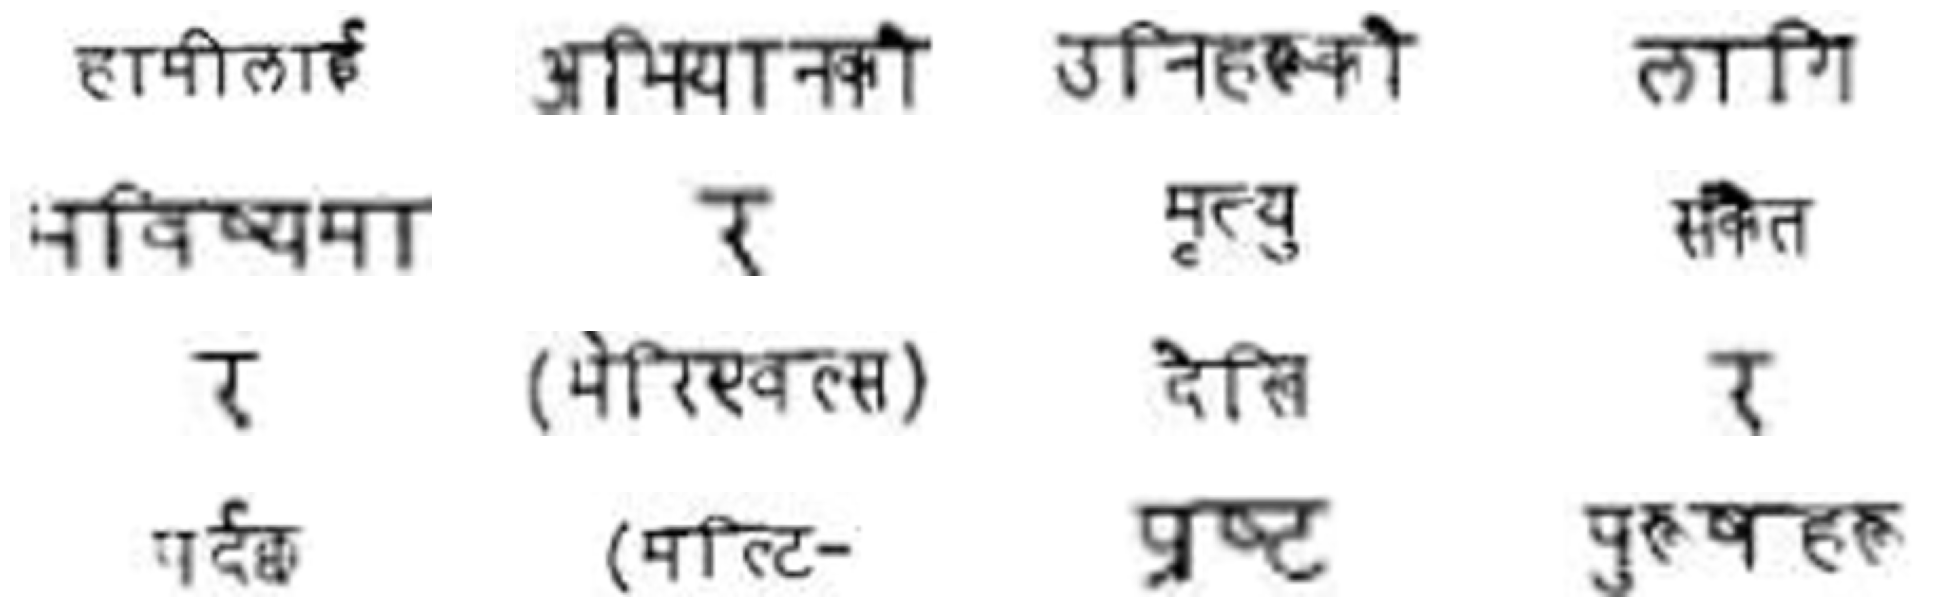

In [42]:
show_images(data=test_ds, cmap='gray')

# Model Definition

### Defines a custom Keras layer that computes and adds the Connectionist Temporal Classification (CTC) loss to the model for training sequence-to-sequence prediction tasks.

In [43]:
class CTCLayer(layers.Layer):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
        self.loss_fn = keras.backend.ctc_batch_cost
    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        loss = self.loss_fn(y_true, y_pred, input_len, label_len)
        self.add_loss(loss)
        return y_pred

### Decodes the predicted labels from the OCR model, converting numeric values back to characters and removing unknown tokens to produce the final text output.

In [44]:
def decode_pred(pred_label):

    '''
    The decode_pred function is used to decode the predicted labels generated by the OCR model.
    It takes a matrix of predicted labels as input, where each time step represents the probability
    for each character. The function uses CTC decoding to decode the numeric labels back into their
    character values. The function also removes any unknown tokens and returns the decoded texts as a
    list of strings. The function utilizes the num_to_char function to map numeric values back to their
    corresponding characters. Overall, the function is an essential step in the OCR process, as it allows
    us to obtain the final text output from the model's predictions.

    Argument :
        pred_label : These are the model predictions which are needed to be decoded.

    Return:
        filtered_text : This is the list of all the decoded and processed predictions.

    '''

    # Input length
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]

    # CTC decode
    decode = keras.backend.ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:,:MAX_LABEL_LENGTH]

    # Converting numerics back to their character values
    chars = num_to_char(decode)

    # Join all the characters
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]

    # Remove the unknown token
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]

    return filtered_texts

### This code defines a deep learning model for optical character recognition (OCR) using a combination of convolutional neural networks (CNNs) for feature extraction and bidirectional long short-term memory (LSTM) networks for sequence learning, concluding with a custom CTC loss layer for training.

In [45]:
# Input Layer
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(
    filters=128,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*128))(x)
encoding = layers.Dense(128, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.5)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.5))(encoding)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.5))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model
ocr_model = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)

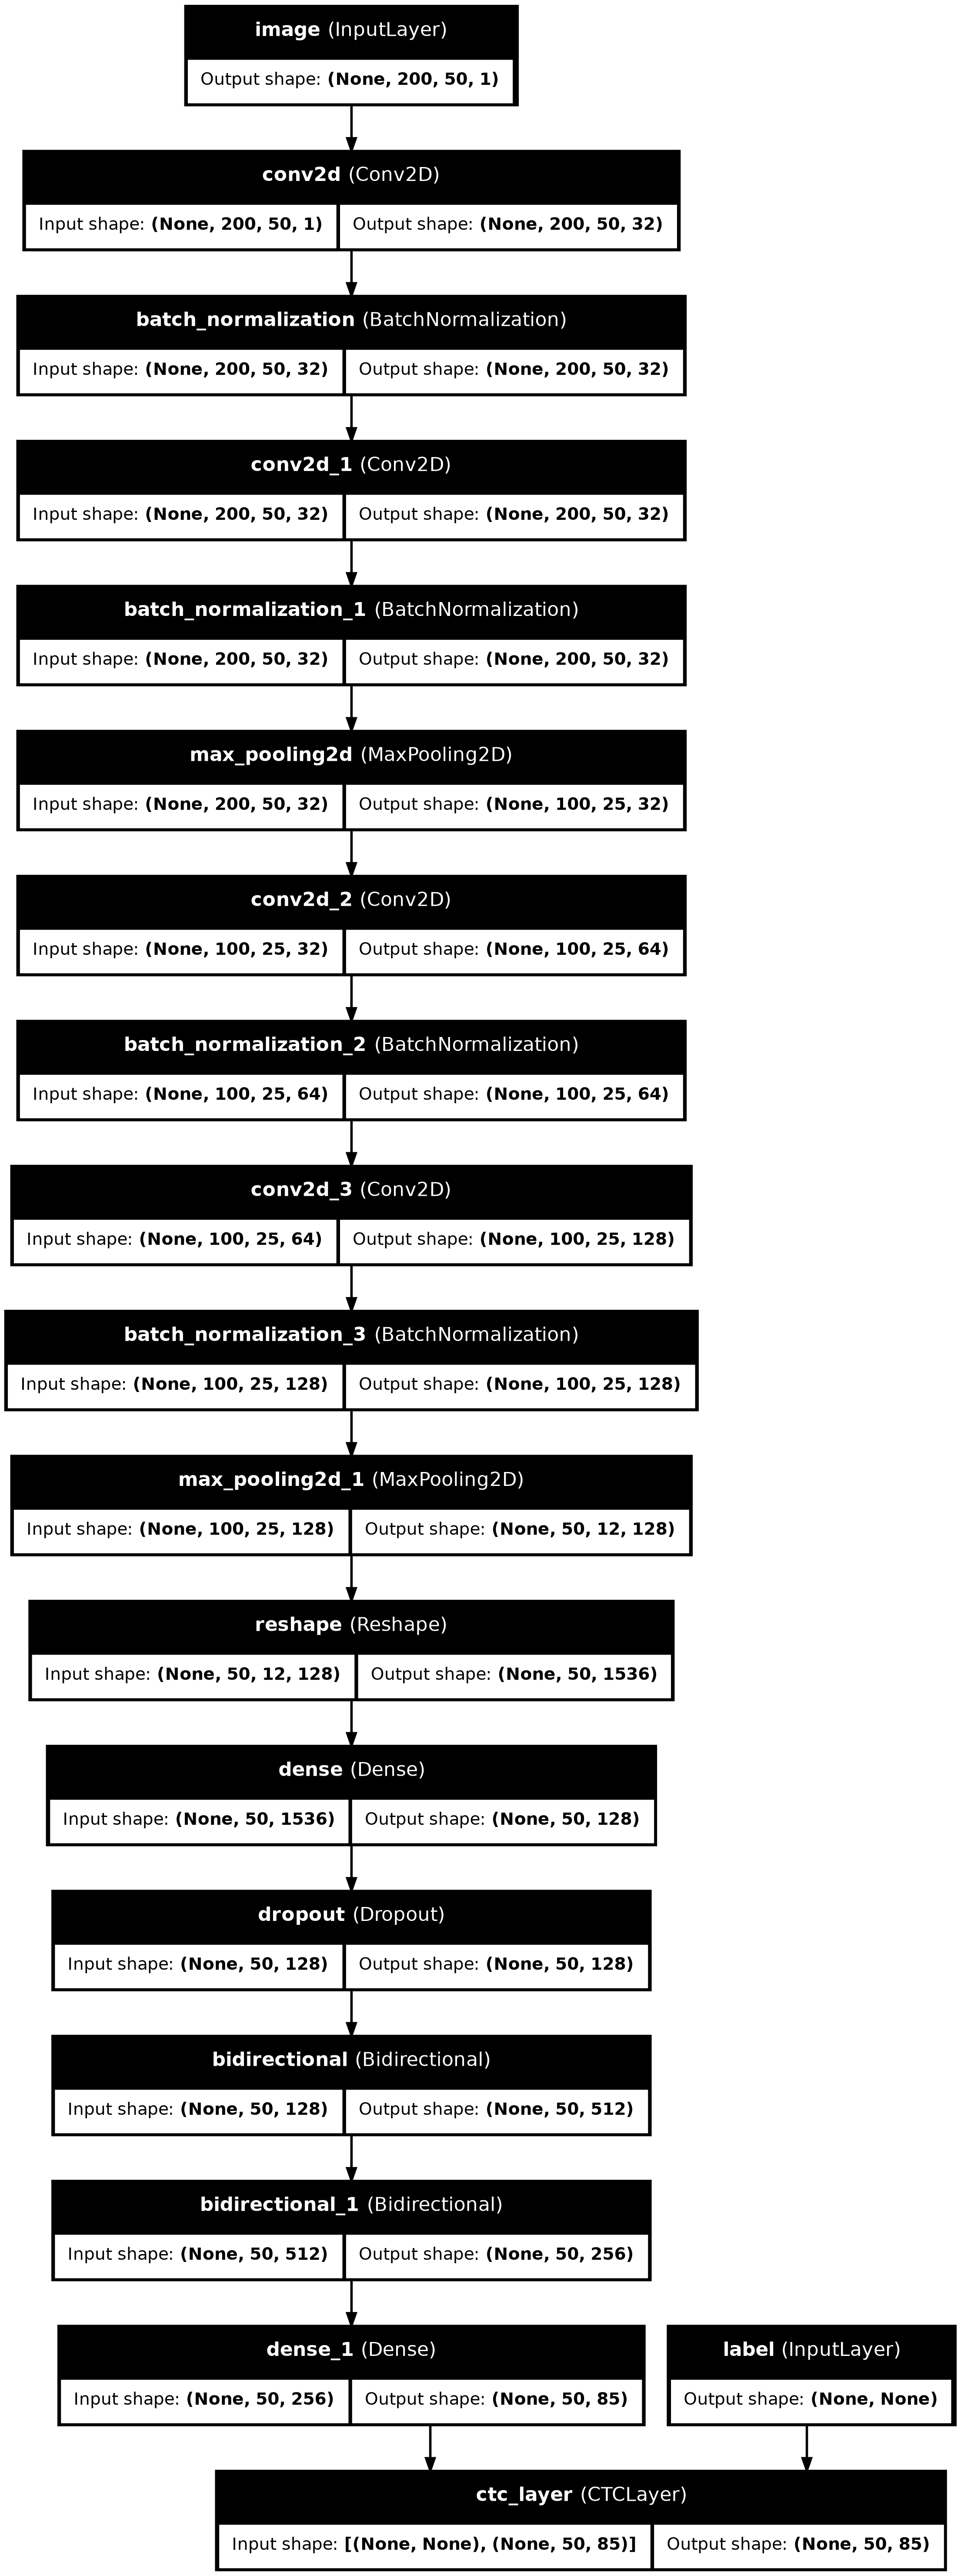

In [46]:
plot_model(ocr_model, show_shapes=True, show_layer_names=True)

### Compiles the OCR model with the Adam optimizer and trains it on the training dataset with validation, using early stopping and model checkpoint callbacks.

Epoch 1/25


2025-10-16 05:22:02.056787: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


1338/1338 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - loss: 287.8586 - val_loss: 258.0406 - learning_rate: 0.0010
Epoch 2/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 55s 41ms/step - loss: 226.9036 - val_loss: 168.6149 - learning_rate: 0.0010
Epoch 3/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 51s 38ms/step - loss: 143.0885 - val_loss: 98.6585 - learning_rate: 0.0010
Epoch 4/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - loss: 92.3515 - val_loss: 51.0760 - learning_rate: 0.0010
Epoch 5/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - loss: 64.6712 - val_loss: 38.7845 - learning_rate: 0.0010
Epoch 6/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - loss: 47.5302 - val_loss: 27.9942 - learning_rate: 0.0010
Epoch 7/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - loss: 35.8523 - val_loss: 19.8888 - learning_rate: 0.0010
Epoch 8/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - loss: 28.3362 - val_loss: 11.7433 - learning_rate: 0.0010
Epoch 9/25
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - loss: 22.4343 - val_

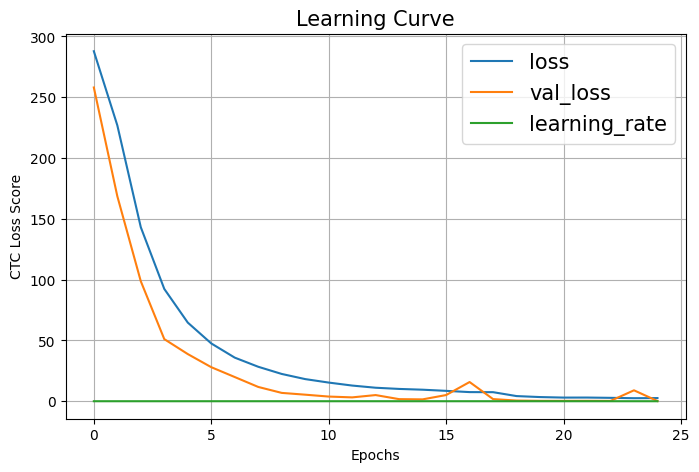

In [47]:
# Compile
ocr_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

# Learning Rate Scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train
history = ocr_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCHS,
    callbacks=[
        callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        lr_scheduler
    ]
)

# Learning Curve
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
# plt.savefig("OCRModel-LearningCurve.png")
plt.show()

In [48]:
# Model Summary
ocr_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 200, 50,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 200, 50,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 200, 50,   │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 200, 50,   │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 50,   │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 100, 25,   │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 100, 25,   │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 25,   │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 100, 25,   │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 25,   │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 50, 12,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 50, 1536)  │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50, 128)   │    196,736 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 50, 128)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 50, 512)   │    788,480 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 50, 256)   │    656,384 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 50, 85)    │     21,845 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 5,298,145 (20.21 MB)

 Trainable params: 1,765,877 (6.74 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 3,531,756 (13.47 MB)

### Creates an inference model from the trained OCR model for making predictions and prints the model summary.

In [50]:
# Model required for inference
# Get the image input from the model inputs (not from input layer)
image_input = ocr_model.input[0]  # First input is the image
# Get the dense layer before CTC (this is the output we want for predictions)
output_layer = ocr_model.get_layer(name='dense_1')  # Updated layer name

inference_model = keras.Model(
    inputs=image_input,
    outputs=output_layer.output
)

# Model summary
inference_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image (InputLayer)              │ (None, 200, 50, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 200, 50, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 50, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 50, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200, 50, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 25, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 25, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 25, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 25, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100, 25, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 1536)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50, 128)        │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 50, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50, 85)         │        21,845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,766,389 (6.74 MB)

 Trainable params: 1,765,877 (6.74 MB)

 Non-trainable params: 512 (2.00 KB)

In [51]:
print(decode_pred(inference_model.predict(test_ds))[:10])   #convert to test_ds

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: image
Received: inputs=['Tensor(shape=(16, 200, 50, 1))']
  warnings.warn(msg)


57/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: image
Received: inputs=['Tensor(shape=(None, 200, 50, 1))']
  warnings.warn(msg)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
['हामीलाई', 'अभियानको', 'उनिहरूको', 'लागि', 'भविष्यमा', 'ह', 'मृत्यु', 'संकेत', 'र', '(भेरिएवल्स)']


/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 84 (T) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 114 (r) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 117 (u) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs

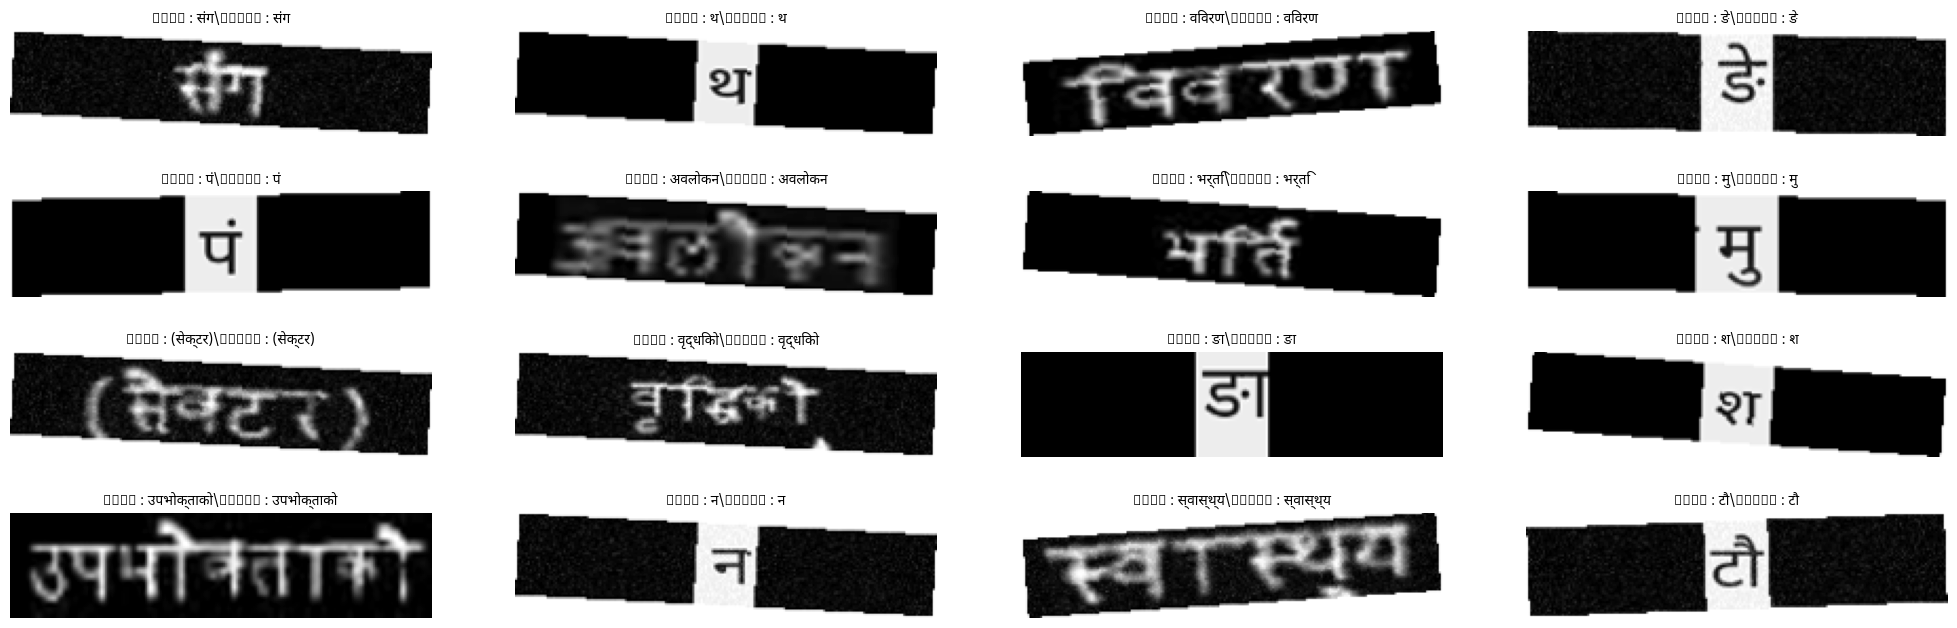

In [52]:
show_images(data=train_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

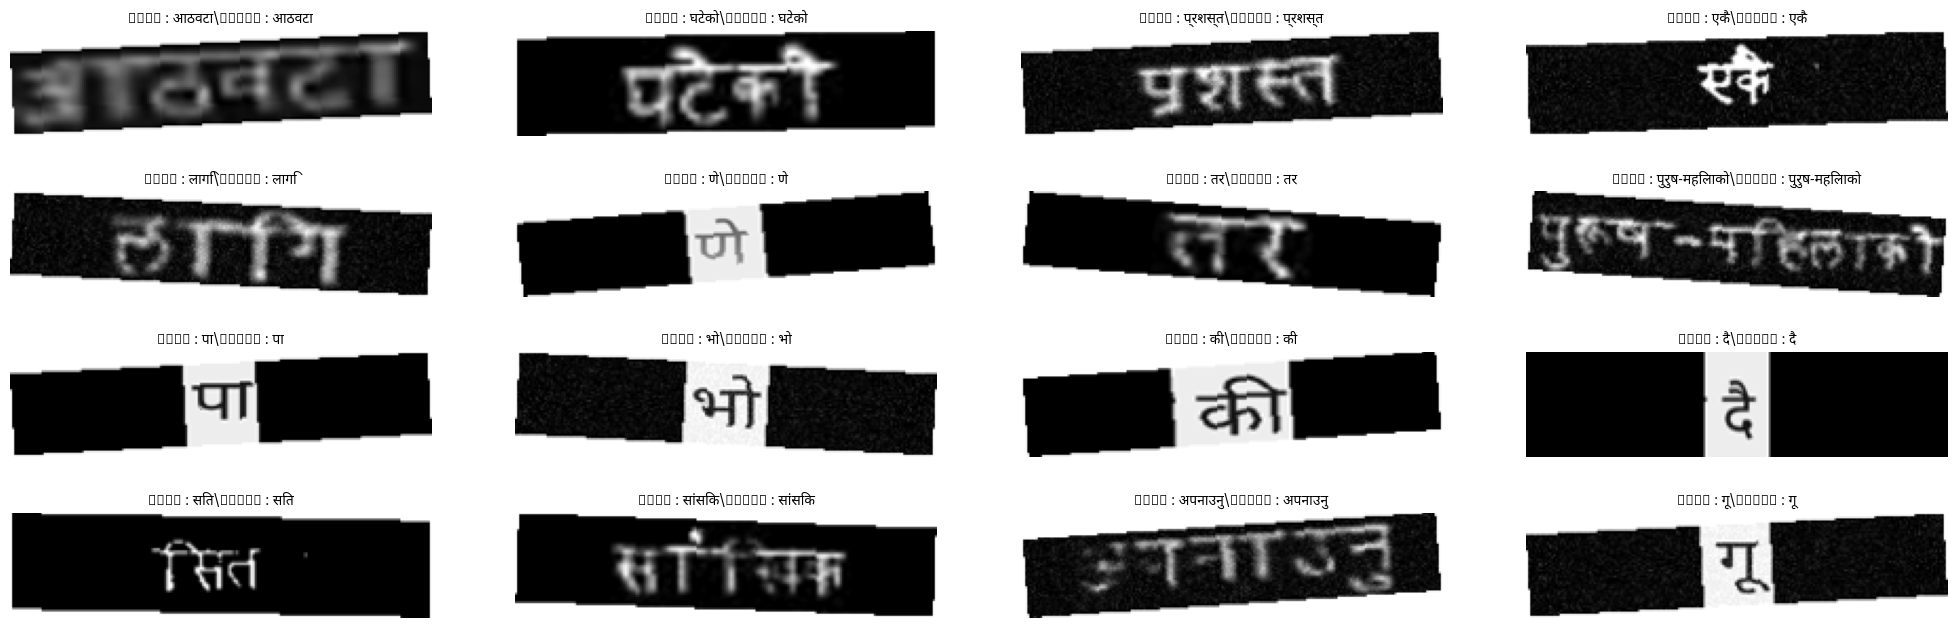

In [53]:
show_images(data=valid_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

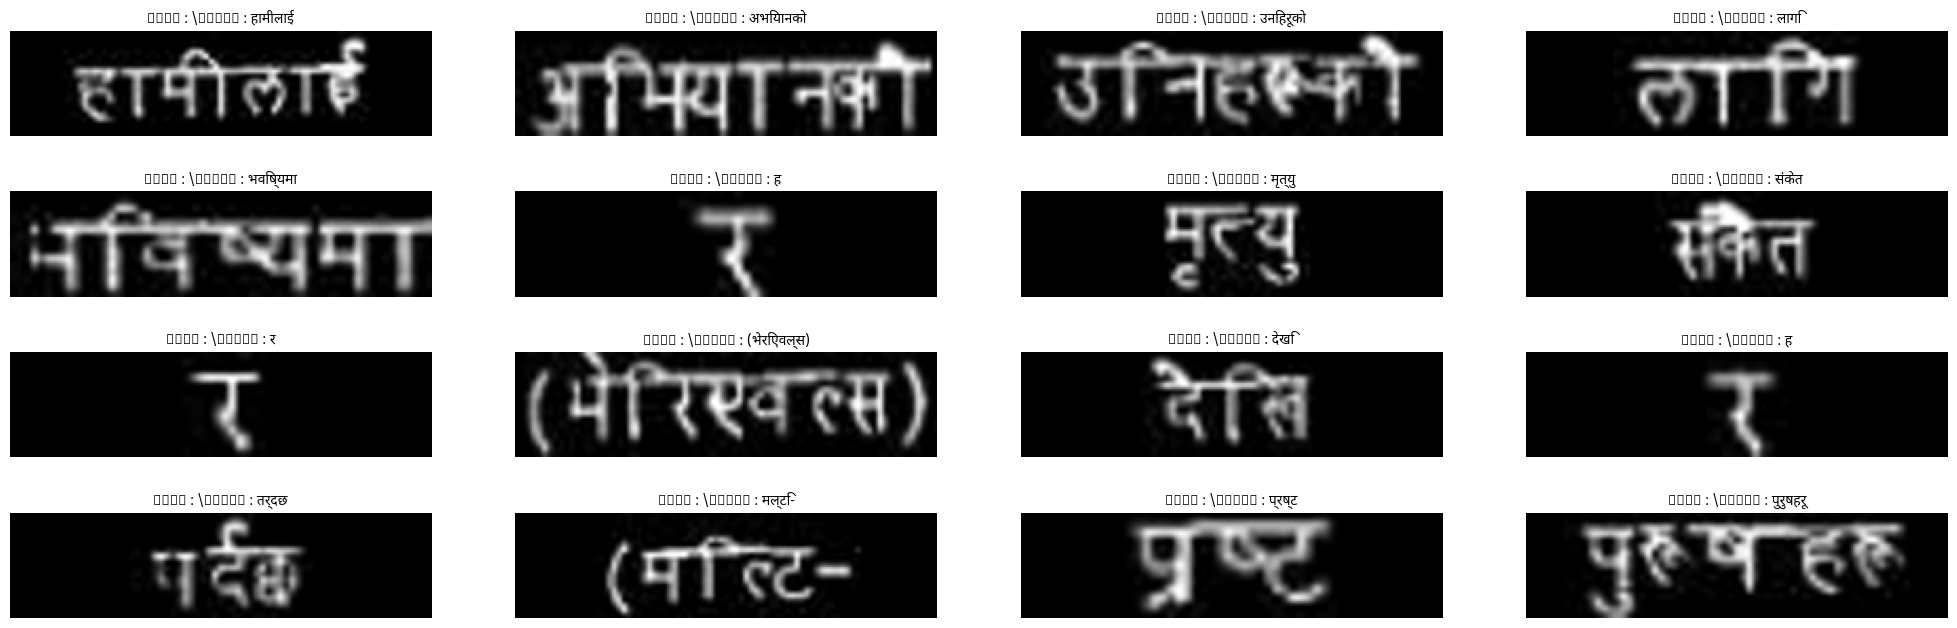

In [54]:
show_images(data=test_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

# Saving the model

In [55]:
# Saving the model
ocr_model.save('ocr_model.h5')

In [56]:
# Load the saved model using the code below
# Need to provide custom objects when loading models with custom layers
ocr_model = keras.models.load_model('ocr_model.h5', custom_objects={'CTCLayer': CTCLayer})

### Loading Models with Custom Layers

When loading a saved model that contains custom layers (like our `CTCLayer`), you need to provide the custom objects to Keras so it knows how to reconstruct the layer. There are two main approaches:

1. **Using `custom_objects` parameter**: Pass a dictionary mapping layer names to their classes
2. **Using `custom_object_scope`**: Use a context manager for cleaner code, especially with multiple custom objects

### Generates and decodes predictions from the inference model on the test dataset, printing the results as it is written in the book.


In [57]:
test_csv.head()

FILENAME IDENTITY
0  ./testing_data1/495;15.png   495;15
1  ./testing_data1/633;30.png   633;30
2  ./testing_data1/987;32.png   987;32
3  ./testing_data1/548;20.png   548;20
4  ./testing_data1/965;30.png   965;30

In [58]:
df_infer = test_csv

# Step 1: Sort the dataframe based on values before ';'
df_infer['before_semicolon'] = df_infer['IDENTITY'].apply(lambda x: int(x.split(';')[0]))
df_infer['after_semicolon'] = df_infer['IDENTITY'].apply(lambda x: int(x.split(';')[1]))
sorted_df = df_infer.sort_values(['before_semicolon']).reset_index(drop=True)
sorted_df.drop(columns=['before_semicolon', 'after_semicolon'], inplace=True)

In [59]:
sorted_df.shape

(1016, 2)

In [60]:
sorted_df.head()

FILENAME IDENTITY
0  ./testing_data1/0;0.png      0;0
1  ./testing_data1/1;0.png      1;0
2  ./testing_data1/2;0.png      2;0
3  ./testing_data1/3;0.png      3;0
4  ./testing_data1/4;0.png      4;0

In [61]:
sorted_df['IDENTITY'] = sorted_df['IDENTITY'].astype(str)

sorted_dfs = tf.data.Dataset.from_tensor_slices(
    (np.array(sorted_df['FILENAME'].to_list()), np.array(sorted_df['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

decoded_predictions = decode_pred(inference_model.predict(sorted_dfs))

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [62]:
sorted_df.head()

FILENAME IDENTITY
0  ./testing_data1/0;0.png      0;0
1  ./testing_data1/1;0.png      1;0
2  ./testing_data1/2;0.png      2;0
3  ./testing_data1/3;0.png      3;0
4  ./testing_data1/4;0.png      4;0

In [63]:
pred = sorted_df['IDENTITY'].tolist()

# Print decoded predictions with a new line when there's a change in the number after ';'
current_group = None
i=0
for prediction in pred:
    before, after = map(int, prediction.split(';'))

    if current_group is None:
        current_group = after

    if after != current_group:
        print()  # Start a new line for the new group
        current_group = after

    print(decoded_predictions[i], end=' ')
    i+=1
print()

लाई विश्लेषण गर्न अति कठिन छु (केसाकार, सन् १६उ८ण जनसंख्या सम्बन्धी सुनियोजित 
तथ्यांकहरू गत दुई दशकको मात्र उपलब्ध छन् त्यस आधिका जनगणनाहरू निक्कै सिमित 
परिधिका हुनुका साथै पछिका तथ्यांक सँग तुलना गर्न समेत नमिल्ने खालका छन् त्यसो 
भर तापनि जनसंख्या वृद्धिको केहि महत्वपूर्ण प्रवृचिहरु (Trends) देखन सकिन्छ 
सम्यतु १९६८ देखि २०२८ साल सम्मकै ६० वर्षको अवधिमा कुल जनसंख्यामा 
महिलाहरूको प्रतिशत ४८ ६६ बाट घटेर ४८ ब७ भयो जस्को फलस्वरूप १६६८ भा देखिएको 
पुरुष-महिलाको अनुपात १:१ बढेर के०२८ सलमा हू ४स्ेप इू हुनगयो विभिन्न वर्षाका 
जनगणना प्रतिवेदनले पुरुष-महिला अनुपात भिन्दा देखाए तापनि महिलाको 
अनुपातमा पुरुषको संख्या बढ्दै गैरहेको तथ्य प्रष्ट हुन्छ सम्वत् १६६८ भा भन्दा 
१६६८७ भा नेपालको जनसंख्या घटेको थियो हू हास दर महिलामा फरन् बढी थियो 
उक्त अवधिको जनसंख्यामा यसरी एक्कासी हास हुन गएको मुख्य कारणहरू मध्ये 
देशव्यापी रूपमा रुघाखोकिको प्रकोप हू पहिलो महायुद्धमा प्रशस्त गोर्खाली सैनिकहरुको 
मृत्यु मानिएको छं सैनिकहरुको परयु र पुरुषहरूको कम गणना भएको सन्दर्भमा हेर्दा 
पनि महिलाहरूको संख्यामा बढ

# Saving pedictions as .txt file

In [64]:
formatted_output = []

current_group = None
i = 0
for prediction in pred:
    before, after = map(int, prediction.split(';'))

    if current_group is None:
        current_group = after

    if after != current_group:
        formatted_output.append('\n')  # Start a new line for the new group
        current_group = after

    formatted_output.append(decoded_predictions[i] + ' ')
    i += 1

formatted_output.append('\n')  # Final new line

with open('formatted_predictions.txt', 'w') as file:
    file.writelines(formatted_output)

In [65]:
predictions = decode_pred(inference_model.predict(valid_ds))
true = df_valid['IDENTITY'].tolist()

204/335 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [66]:
import numpy as np
from difflib import SequenceMatcher

def calculate_cer(predicted, ground_truth):
    # Calculate the Levenshtein distance between the predicted and ground truth
    matcher = SequenceMatcher(None, ground_truth, predicted)
    num_edits = sum(triple[-1] for triple in matcher.get_opcodes() if triple[0] != 'equal')

    # CER is the number of edits divided by the total number of characters in the ground truth
    return num_edits / len(ground_truth) if len(ground_truth) > 0 else 1.0

def calculate_accuracy(true_list, predictions_list):
    correct_count = sum([pred == gt for pred, gt in zip(predictions_list, true_list)])
    return correct_count / len(true_list)

# Calculate CER for each word and the overall Accuracy
cer_list = [calculate_cer(pred, gt) for pred, gt in zip(predictions, true)]
cer = np.mean(cer_list)

accuracy = calculate_accuracy(true, predictions)

print(f"Character Error Rate (CER): {cer}")
print(f"Accuracy: {accuracy}")

Character Error Rate (CER): 0.0019314641744548285
Accuracy: 0.9986915887850467


/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 84 (T) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 114 (r) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 117 (u) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeus/miniconda3/envs

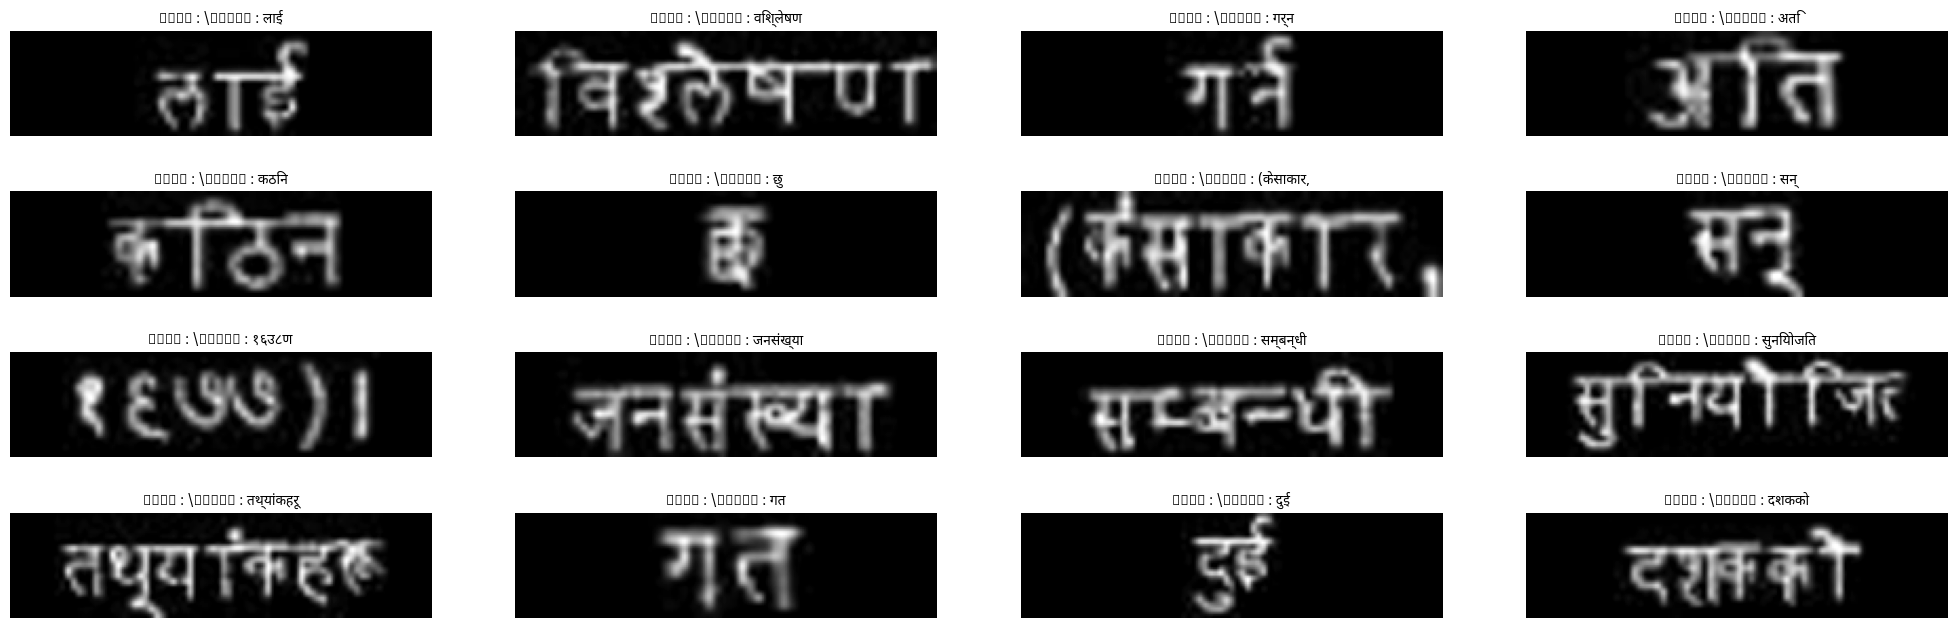

In [67]:
sorted_df = tf.data.Dataset.from_tensor_slices(
    (np.array(sorted_df['FILENAME'].to_list()), np.array(sorted_df['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
show_images(data=sorted_df, model=inference_model, decode_pred=decode_pred, cmap='binary')